<a href="https://colab.research.google.com/github/HaTranUSF/Portfolio/blob/main/Next_Leg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
combined_flight_data_df=pd.read_csv("/data-1752460033070.csv")

In [ ]:


# Assume combined_flight_data_df is your DataFrame
# (It would have been loaded from your PostgreSQL database in previous steps)

# For demonstration, let's create a dummy DataFrame with some NaNs
# If you already have combined_flight_data_df loaded, you can skip this block
# combined_flight_data_df = pd.DataFrame({
#     'flight_date': ['2024-01-01', '2024-01-02', '2024-01-03'],
#     'tavg': [25.5, None, 28.0],
#     'prcp': [0.1, 0.0, None],
#     'weather_delay': [0, 1, None]
# })
# print("DataFrame before imputation:")
# print(combined_flight_data_df)
# print("\nMissing values before imputation:")
# print(combined_flight_data_df.isnull().sum())

# Impute all missing values with 0
combined_flight_data_df_imputed = combined_flight_data_df.fillna(0)

print("\n--- DataFrame after imputing missing values with 0 ---")
print(combined_flight_data_df_imputed.head())

print("\n--- Missing values after imputation ---")
print(combined_flight_data_df_imputed.isnull().sum())

# You can now continue working with 'combined_flight_data_df_imputed'
# For example, check if there are any remaining NaNs
print(f"\nAre there any remaining missing values? {combined_flight_data_df_imputed.isnull().any().any()}")


--- DataFrame after imputing missing values with 0 ---
  flight_date unique_carrier  flight_num origin_airport dest_airport  \
0  2024-08-01             WN       274.0            SAN          SAT   
1  2024-08-01             WN      4188.0            DCA          TPA   
2  2024-08-01             WN      5015.0            LAS          LGB   
3  2024-08-01             WN      5291.0            MDW          DEN   
4  2024-08-01             YX      3526.0            EWR          MSN   

   crs_dep_time  crs_arr_time  cancelled  weather_delay  distance  \
0           825          1315      False            0.0      1129   
1           730           950      False            0.0       814   
2           740           850      False            0.0       231   
3           545           720      False            0.0       895   
4          1910          2052       True            0.0       799   

    airport_type  tavg  tmin  tmax  prcp  snow  wspd    pres  
0  large_airport  21.4  19.4  24.

In [ ]:
# Assume combined_flight_data_df_imputed is your DataFrame after previous steps
# (Loading, Imputation, Time-based Feature Engineering)

# Define the list of columns to be One-Hot Encoded
categorical_columns = [
    'airport_type',

]

print("--- DataFrame shape BEFORE One-Hot Encoding:", combined_flight_data_df_imputed.shape)
print("--- Columns BEFORE One-Hot Encoding:", combined_flight_data_df_imputed.columns.tolist())

# Perform One-Hot Encoding
# drop_first=True prevents multicollinearity by dropping the first category of each feature
combined_flight_data_df_encoded = pd.get_dummies(
    combined_flight_data_df_imputed,
    columns=categorical_columns,
    drop_first=True, # Recommended to avoid multicollinearity
    dtype=int # To ensure the new columns are integers (0 or 1)
)

print("\n--- DataFrame shape AFTER One-Hot Encoding:", combined_flight_data_df_encoded.shape)
print("--- New columns created (sample):")
# Identify new columns created by get_dummies that start with the original column names
new_encoded_columns = [col for col in combined_flight_data_df_encoded.columns if any(col.startswith(cat + '_') for cat in categorical_columns)]
print(new_encoded_columns[:10]) # Print first 10 new columns if many

print("\n--- Original categorical columns (should be gone):")
# Verify that the original categorical columns are no longer present
missing_original_cols = [col for col in categorical_columns if col not in combined_flight_data_df_encoded.columns]
if not missing_original_cols:
    print("All original categorical columns were successfully replaced by their one-hot encoded versions.")
else:
    print(f"Error: Some original categorical columns still exist: {missing_original_cols}")

print("\n--- First 5 rows of DataFrame AFTER One-Hot Encoding (sample) ---")
print(combined_flight_data_df_encoded.head())

--- DataFrame shape BEFORE One-Hot Encoding: (827020, 18)
--- Columns BEFORE One-Hot Encoding: ['flight_date', 'unique_carrier', 'flight_num', 'origin_airport', 'dest_airport', 'crs_dep_time', 'crs_arr_time', 'cancelled', 'weather_delay', 'distance', 'airport_type', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wspd', 'pres']

--- DataFrame shape AFTER One-Hot Encoding: (827020, 17)
--- New columns created (sample):
[]

--- Original categorical columns (should be gone):
Error: Some original categorical columns still exist: ['airport_type']

--- First 5 rows of DataFrame AFTER One-Hot Encoding (sample) ---
  flight_date unique_carrier  flight_num origin_airport dest_airport  \
0  2024-08-01             WN       274.0            SAN          SAT   
1  2024-08-01             WN      4188.0            DCA          TPA   
2  2024-08-01             WN      5015.0            LAS          LGB   
3  2024-08-01             WN      5291.0            MDW          DEN   
4  2024-08-01             YX    

--- Performing Feature Engineering ---
- Added 'prcp_wspd_interaction'
- Added 'tmin_wspd_interaction'
- Added 'tmin_prcp_interaction'
- Added 'adverse_weather_index'
--- Feature Engineering Complete ---

Original X shape (with new features): (827020, 10)
Original y shape: (827020,)
Target distribution before split:
cancelled
False    815280
True      11740
Name: count, dtype: int64

--- Data Distribution After Split ---
Training Set (y_train) Class Counts:
 cancelled
False    652224
True       9392
Name: count, dtype: int64
Test Set (y_test) Class Counts:
 cancelled
False    163056
True       2348
Name: count, dtype: int64

--- Creating Pipeline for SMOTE + Logistic Regression ---

--- Training Logistic Regression Model (Pipeline) ---
Logistic Regression Pipeline trained successfully.

--- Evaluating Logistic Regression Model Performance (from Pipeline) ---

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.99      0.69      0.81

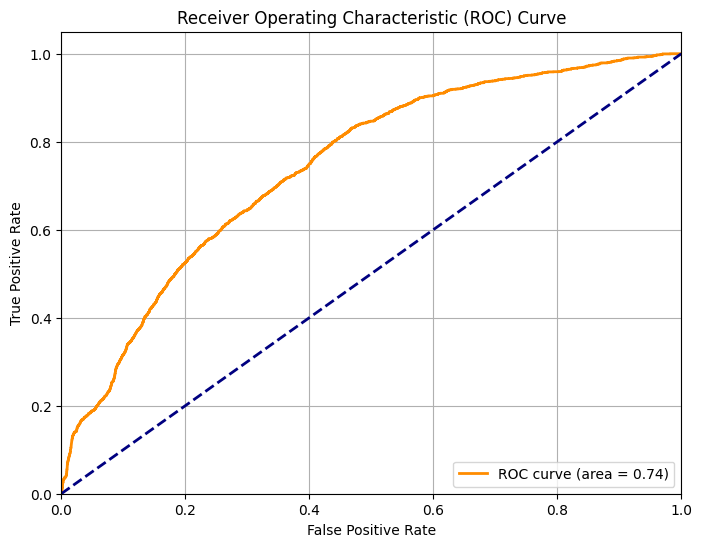

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Ensure 'combined_flight_data_df_imputed' is available in your environment.
# For demonstration purposes, I'll create a dummy DataFrame if it's not defined.
try:
    df_your_data = combined_flight_data_df_imputed
except NameError:
    print("Warning: 'combined_flight_data_df_imputed' not found. Creating dummy data for demonstration.")
    # Create a dummy DataFrame for demonstration if the actual one is not available
    data = {
        'weather_delay': np.random.rand(1000) * 100,
        'distance': np.random.rand(1000) * 1000,
        'tmin': np.random.rand(1000) * 50 - 20, # Temp between -20 and 30
        'prcp': np.random.rand(1000) * 10,
        'wspd': np.random.rand(1000) * 30,
        'pres': np.random.rand(1000) * 100 + 950,
        'cancelled': np.random.randint(0, 2, 1000)
    }
    df_your_data = pd.DataFrame(data)
    # Introduce some imbalance for 'cancelled'
    df_your_data['cancelled'] = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])


# --- FEATURE ENGINEERING ---
# Create new interaction features based on existing ones
print("--- Performing Feature Engineering ---")

# Ensure columns exist before creating new features
required_cols = ['weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres', 'cancelled']
if not all(col in df_your_data.columns for col in required_cols):
    print("Warning: Not all required columns for feature engineering are present in df_your_data.")
    print("Please ensure df_your_data contains:", required_cols)

# Interaction 1: Precipitation and Wind Speed
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['prcp_wspd_interaction'] = df_your_data['prcp'] * df_your_data['wspd']
    print("- Added 'prcp_wspd_interaction'")
else:
    print("- Could not add 'prcp_wspd_interaction' due to missing base columns.")

# Interaction 2: Temperature and Wind Speed
if 'tmin' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['tmin_wspd_interaction'] = df_your_data['tmin'] * df_your_data['wspd']
    print("- Added 'tmin_wspd_interaction'")
else:
    print("- Could not add 'tmin_wspd_interaction' due to missing base columns.")

# Interaction 3: Temperature and Precipitation
if 'tmin' in df_your_data.columns and 'prcp' in df_your_data.columns:
    df_your_data['tmin_prcp_interaction'] = df_your_data['tmin'] * df_your_data['prcp']
    print("- Added 'tmin_prcp_interaction'")
else:
    print("- Could not add 'tmin_prcp_interaction' due to missing base columns.")

# Heuristic: Simple Adverse Weather Index (Higher means potentially worse weather)
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns and 'tmin' in df_your_data.columns:
    # Adding prcp and wspd as they are generally bad, subtracting tmin as lower temp is worse
    df_your_data['adverse_weather_index'] = (
        df_your_data['prcp'] + df_your_data['wspd'] - df_your_data['tmin']
    )
    print("- Added 'adverse_weather_index'")
else:
    print("- Could not add 'adverse_weather_index' due to missing base columns.")

print("--- Feature Engineering Complete ---")


# Define your features (X) and target (y) with the new features included
features_for_X = [
    'weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres',
    'prcp_wspd_interaction', 'tmin_wspd_interaction',
    'tmin_prcp_interaction', 'adverse_weather_index'
]

# Filter out any features that might not have been created if base columns were missing
features_for_X = [f for f in features_for_X if f in df_your_data.columns]
if len(features_for_X) < 10:
    print(f"Warning: Only {len(features_for_X)} out of 10 intended features are present after engineering.")


X = df_your_data[features_for_X]
y = df_your_data['cancelled']

print(f"\nOriginal X shape (with new features): {X.shape}")
print(f"Original y shape: {y.shape}")
print(f"Target distribution before split:\n{y.value_counts()}")


# --- 1. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Distribution After Split ---")
print("Training Set (y_train) Class Counts:\n", y_train.value_counts())
print("Test Set (y_test) Class Counts:\n", y_test.value_counts())


# --- 2. Create the Pipeline for SMOTE and Logistic Regression Classifier ---
print("\n--- Creating Pipeline for SMOTE + Logistic Regression ---")
# Directly instantiate the pipeline without hyperparameter tuning
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

# --- 3. Train the Pipeline Model ---
print("\n--- Training Logistic Regression Model (Pipeline) ---")
pipeline.fit(X_train, y_train)
print("Logistic Regression Pipeline trained successfully.")


# --- 4. Evaluate the Trained Model on the Original Test Set ---
print("\n--- Evaluating Logistic Regression Model Performance (from Pipeline) ---")

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]


print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision (for cancelled=1): {precision:.4f}")
print(f"Recall (for cancelled=1): {recall:.4f}")
print(f"F1-Score (for cancelled=1): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

--- Performing Feature Engineering ---
- Added 'prcp_wspd_interaction'
- Added 'tmin_wspd_interaction'
- Added 'tmin_prcp_interaction'
- Added 'adverse_weather_index'
--- Feature Engineering Complete ---

Original X shape (with new features): (827020, 10)
Original y shape: (827020,)
Target distribution before split:
{np.False_: np.int64(815280), np.True_: np.int64(11740)}

--- Data Distribution After Split ---
Training Set (y_train) Class Counts:
 [652224   9392]
Test Set (y_test) Class Counts:
 [163056   2348]

--- Creating Pipeline for SMOTE + StandardScaler + Neural Network ---

--- Training Neural Network Model (Pipeline) ---
This may take a few minutes depending on your data size and system.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Pipeline trained successfully.

--- Evaluating Neural Network Model Performance (from Pipeline) ---

--- Classification Report ---
              precision    recall  f1-score   support

       False       0.99      0.85      0.91    163056
        True       0.06      0.70      0.11      2348

    accuracy                           0.84    165404
   macro avg       0.53      0.78      0.51    165404
weighted avg       0.98      0.84      0.90    165404

Overall Accuracy: 0.8446
Precision (for cancelled=1): 0.0620
Recall (for cancelled=1): 0.7036
F1-Score (for cancelled=1): 0.1139
ROC AUC Score: 0.8470

Confusion Matrix:
[[138047  25009]
 [   696   1652]]


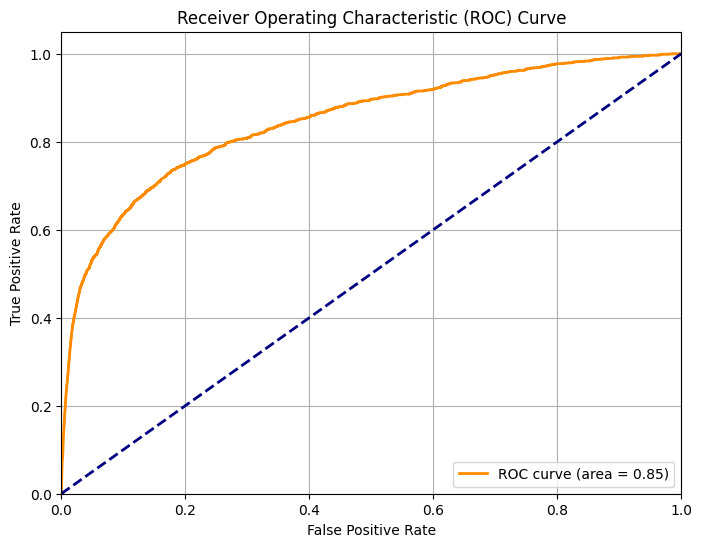

In [ ]:
# Install scikeras if it's not already installed
# This line is added to resolve the ModuleNotFoundError
try:
    import scikeras
except ImportError:
    print("scikeras not found. Installing...")
    !pip install scikeras
    import scikeras # Try importing again after installation
    print("scikeras installed successfully.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # New: For scaling features for NN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Neural Network specific imports
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier # To use Keras model in sklearn pipeline

# Ensure 'combined_flight_data_df_imputed' is available in your environment.
# For demonstration purposes, I'll create a dummy DataFrame if it's not defined.
try:
    df_your_data = combined_flight_data_df_imputed
except NameError:
    print("Warning: 'combined_flight_data_df_imputed' not found. Creating dummy data for demonstration.")
    # Create a dummy DataFrame for demonstration if the actual one is not available
    data = {
        'weather_delay': np.random.rand(1000) * 100,
        'distance': np.random.rand(1000) * 1000,
        'tmin': np.random.rand(1000) * 50 - 20, # Temp between -20 and 30
        'prcp': np.random.rand(1000) * 10,
        'wspd': np.random.rand(1000) * 30,
        'pres': np.random.rand(1000) * 100 + 950,
        'cancelled': np.random.randint(0, 2, 1000)
    }
    df_your_data = pd.DataFrame(data)
    # Introduce some imbalance for 'cancelled'
    df_your_data['cancelled'] = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])


# --- FEATURE ENGINEERING ---
# Create new interaction features based on existing ones
print("--- Performing Feature Engineering ---")

# Ensure columns exist before creating new features
required_cols = ['weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres', 'cancelled']
if not all(col in df_your_data.columns for col in required_cols):
    print("Warning: Not all required columns for feature engineering are present in df_your_data.")
    print("Please ensure df_your_data contains:", required_cols)

# Interaction 1: Precipitation and Wind Speed
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['prcp_wspd_interaction'] = df_your_data['prcp'] * df_your_data['wspd']
    print("- Added 'prcp_wspd_interaction'")
else:
    print("- Could not add 'prcp_wspd_interaction' due to missing base columns.")

# Interaction 2: Temperature and Wind Speed
if 'tmin' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['tmin_wspd_interaction'] = df_your_data['tmin'] * df_your_data['wspd']
    print("- Added 'tmin_wspd_interaction'")
else:
    print("- Could not add 'tmin_wspd_interaction' due to missing base columns.")

# Interaction 3: Temperature and Precipitation
if 'tmin' in df_your_data.columns and 'prcp' in df_your_data.columns:
    df_your_data['tmin_prcp_interaction'] = df_your_data['tmin'] * df_your_data['prcp']
    print("- Added 'tmin_prcp_interaction'")
else:
    print("- Could not add 'tmin_prcp_interaction' due to missing base columns.")

# Heuristic: Simple Adverse Weather Index (Higher means potentially worse weather)
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns and 'tmin' in df_your_data.columns:
    # Adding prcp and wspd as they are generally bad, subtracting tmin as lower temp is worse
    df_your_data['adverse_weather_index'] = (
        df_your_data['prcp'] + df_your_data['wspd'] - df_your_data['tmin']
    )
    print("- Added 'adverse_weather_index'")
else:
    print("- Could not add 'adverse_weather_index' due to missing base columns.")

print("--- Feature Engineering Complete ---")


# Define your features (X) and target (y) with the new features included
features_for_X = [
    'weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres',
    'prcp_wspd_interaction', 'tmin_wspd_interaction',
    'tmin_prcp_interaction', 'adverse_weather_index'
]

# Filter out any features that might not have been created if base columns were missing
features_for_X = [f for f in features_for_X if f in df_your_data.columns]
if len(features_for_X) < 10:
    print(f"Warning: Only {len(features_for_X)} out of 10 intended features are present after engineering.")


X = df_your_data[features_for_X].values # Convert X to NumPy array
y = df_your_data['cancelled'].values   # Convert y to NumPy array

print(f"\nOriginal X shape (with new features): {X.shape}")
print(f"Original y shape: {y.shape}")
# y.value_counts() won't work on numpy array, so we use np.bincount
unique, counts = np.unique(y, return_counts=True)
print(f"Target distribution before split:\n{dict(zip(unique, counts))}")


# --- 1. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Distribution After Split ---")
print("Training Set (y_train) Class Counts:\n", np.bincount(y_train)) # Use np.bincount for numpy arrays
print("Test Set (y_test) Class Counts:\n", np.bincount(y_test)) # Use np.bincount for numpy arrays


# --- 2. Define the Neural Network Model Creation Function ---
# This function will be passed to KerasClassifier
def create_nn_model(input_dim):
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        keras.layers.Dropout(0.2), # Dropout for regularization
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation='sigmoid') # Sigmoid for binary classification
    ])
    # Use a custom learning rate for Adam optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy', # Appropriate loss for binary classification
                  metrics=['accuracy'])
    return model


# --- 3. Create the Pipeline for SMOTE, StandardScaler, and KerasClassifier ---
print("\n--- Creating Pipeline for SMOTE + StandardScaler + Neural Network ---")
# The KerasClassifier wrapper allows us to use the Keras model in an sklearn pipeline
# We pass the build_fn (our model creation function) and other Keras-specific parameters
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()), # Scale features for Neural Network
    ('nn_classifier', KerasClassifier(
        model=create_nn_model,
        # Pass input_dim to the model creation function
        model__input_dim=X_train.shape[1],
        epochs=50,       # Number of training epochs
        batch_size=32,   # Batch size for training
        verbose=0,       # Set to 1 or 2 for more verbose output during training
        random_state=42,
        # class_weight can be passed here or handled by SMOTE.
        # For imbalanced datasets, SMOTE is usually preferred before NN training.
        # If you still want to add class weights to the NN loss, calculate them:
        # class_weights = {0: 1., 1: (len(y_train) / y_train.value_counts()[1])}
        # class_weight=class_weights
    ))
])

# --- 4. Train the Pipeline Model ---
print("\n--- Training Neural Network Model (Pipeline) ---")
print("This may take a few minutes depending on your data size and system.")
pipeline.fit(X_train, y_train)
print("Neural Network Pipeline trained successfully.")


# --- 5. Evaluate the Trained Model on the Original Test Set ---
print("\n--- Evaluating Neural Network Model Performance (from Pipeline) ---")

# Access the scaler and the KerasClassifier directly from the fitted pipeline
scaler_from_pipeline = pipeline.named_steps['scaler']
nn_classifier_from_pipeline = pipeline.named_steps['nn_classifier']

# Transform X_test using the fitted scaler
X_test_scaled = scaler_from_pipeline.transform(X_test)

# Now call predict_proba on the KerasClassifier instance with the scaled data
y_pred_proba = nn_classifier_from_pipeline.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to binary predictions using a default threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Overall Accuracy: {accuracy:.4f}")
print(f"Precision (for cancelled=1): {precision:.4f}")
print(f"Recall (for cancelled=1): {recall:.4f}")
print(f"F1-Score (for cancelled=1): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


scikeras not found. Installing...
scikeras installed successfully.
--- Performing Feature Engineering ---
- Added 'prcp_wspd_interaction'
- Added 'tmin_wspd_interaction'
- Added 'tmin_prcp_interaction'
- Added 'adverse_weather_index'
--- Feature Engineering Complete ---

Original X shape (with new features): (827020, 10)
Original y shape: (827020,)
Target distribution before split:
{np.False_: np.int64(815280), np.True_: np.int64(11740)}

--- Data Distribution After Split ---
Training Set (y_train) Class Counts:
 [652224   9392]
Test Set (y_test) Class Counts:
 [163056   2348]

--- Defining Base Classifiers for the Ensemble ---
- Logistic Regression initialized.
- Decision Tree Classifier initialized.
- Random Forest Classifier initialized.

--- Creating Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---

--- Training Ensemble Model (Pipeline) ---
This may take a few moments depending on your data size and system.
Ensemble Pipeline trained successfully.

--- Evaluating E

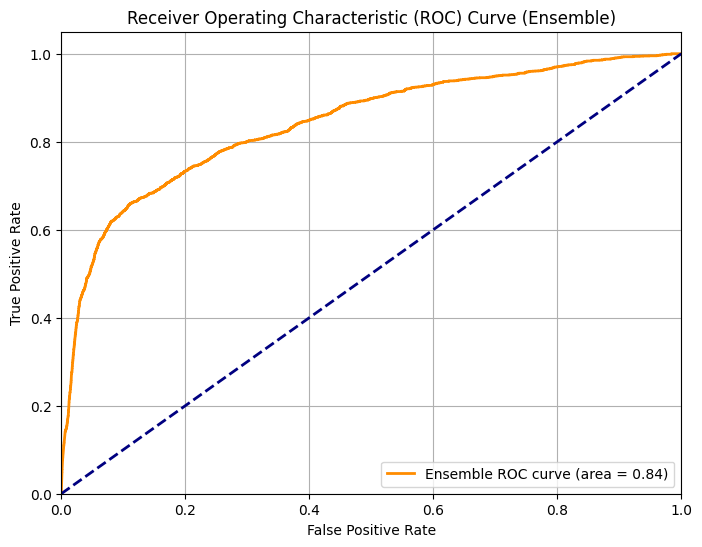


--- Individual Classifier Performance (for comparison - rough estimate without full pipeline) ---

-- Logistic Regression --
Accuracy: 0.6864, ROC AUC: 0.7423

-- Decision Tree --
Accuracy: 0.8302, ROC AUC: 0.8164

-- Random Forest --
Accuracy: 0.8743, ROC AUC: 0.8563


In [ ]:
# Install scikeras if it's not already installed
# This line is added to resolve the ModuleNotFoundError
try:
    import scikeras
except ImportError:
    print("scikeras not found. Installing...")
    !pip install scikeras
    import scikeras # Try importing again after installation
    print("scikeras installed successfully.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Classifiers for Ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # New Classifier for Ensemble
from sklearn.ensemble import VotingClassifier # For Ensemble Learning

# Ensure 'combined_flight_data_df_imputed' is available in your environment.
# For demonstration purposes, I'll create a dummy DataFrame if it's not defined.
try:
    df_your_data = combined_flight_data_df_imputed
except NameError:
    print("Warning: 'combined_flight_data_df_imputed' not found. Creating dummy data for demonstration.")
    # Create a dummy DataFrame for demonstration if the actual one is not available
    data = {
        'weather_delay': np.random.rand(1000) * 100,
        'distance': np.random.rand(1000) * 1000,
        'tmin': np.random.rand(1000) * 50 - 20, # Temp between -20 and 30
        'prcp': np.random.rand(1000) * 10,
        'wspd': np.random.rand(1000) * 30,
        'pres': np.random.rand(1000) * 100 + 950,
        'cancelled': np.random.randint(0, 2, 1000)
    }
    df_your_data = pd.DataFrame(data)
    # Introduce some imbalance for 'cancelled'
    df_your_data['cancelled'] = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])


# --- FEATURE ENGINEERING ---
# Create new interaction features based on existing ones
print("--- Performing Feature Engineering ---")

# Ensure columns exist before creating new features
required_cols = ['weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres', 'cancelled']
if not all(col in df_your_data.columns for col in required_cols):
    print("Warning: Not all required columns for feature engineering are present in df_your_data.")
    print("Please ensure df_your_data contains:", required_cols)

# Interaction 1: Precipitation and Wind Speed
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['prcp_wspd_interaction'] = df_your_data['prcp'] * df_your_data['wspd']
    print("- Added 'prcp_wspd_interaction'")
else:
    print("- Could not add 'prcp_wspd_interaction' due to missing base columns.")

# Interaction 2: Temperature and Wind Speed
if 'tmin' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['tmin_wspd_interaction'] = df_your_data['tmin'] * df_your_data['wspd']
    print("- Added 'tmin_wspd_interaction'")
else:
    print("- Could not add 'tmin_wspd_interaction' due to missing base columns.")

# Interaction 3: Temperature and Precipitation
if 'tmin' in df_your_data.columns and 'prcp' in df_your_data.columns:
    df_your_data['tmin_prcp_interaction'] = df_your_data['tmin'] * df_your_data['prcp']
    print("- Added 'tmin_prcp_interaction'")
else:
    print("- Could not add 'tmin_prcp_interaction' due to missing base columns.")

# Heuristic: Simple Adverse Weather Index (Higher means potentially worse weather)
if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns and 'tmin' in df_your_data.columns:
    # Adding prcp and wspd as they are generally bad, subtracting tmin as lower temp is worse
    df_your_data['adverse_weather_index'] = (
        df_your_data['prcp'] + df_your_data['wspd'] - df_your_data['tmin']
    )
    print("- Added 'adverse_weather_index'")
else:
    print("- Could not add 'adverse_weather_index' due to missing base columns.")

print("--- Feature Engineering Complete ---")


# Define your features (X) and target (y) with the new features included
features_for_X = [
    'weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres',
    'prcp_wspd_interaction', 'tmin_wspd_interaction',
    'tmin_prcp_interaction', 'adverse_weather_index'
]

# Filter out any features that might not have been created if base columns were missing
features_for_X = [f for f in features_for_X if f in df_your_data.columns]
if len(features_for_X) < 10:
    print(f"Warning: Only {len(features_for_X)} out of 10 intended features are present after engineering.")


X = df_your_data[features_for_X].values # Convert X to NumPy array
y = df_your_data['cancelled'].values   # Convert y to NumPy array

print(f"\nOriginal X shape (with new features): {X.shape}")
print(f"Original y shape: {y.shape}")
# y.value_counts() won't work on numpy array, so we use np.bincount
unique, counts = np.unique(y, return_counts=True)
print(f"Target distribution before split:\n{dict(zip(unique, counts))}")


# --- 1. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Distribution After Split ---")
print("Training Set (y_train) Class Counts:\n", np.bincount(y_train))
print("Test Set (y_test) Class Counts:\n", np.bincount(y_test))


# --- 2. Define Individual Classifiers for the Ensemble ---
print("\n--- Defining Base Classifiers for the Ensemble ---")

# Logistic Regression
# Use 'liblinear' solver for small datasets or L1 regularization
# 'C' is the inverse of regularization strength; smaller values mean stronger regularization.
clf1 = LogisticRegression(random_state=42, solver='liblinear', C=0.1)

# Decision Tree Classifier
# Max depth to prevent overfitting, min samples split to ensure meaningful splits
clf2 = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5)

# Random Forest Classifier (our chosen third classifier)
# n_estimators: number of trees in the forest
# max_features: number of features to consider when looking for the best split
clf3 = RandomForestClassifier(random_state=42, n_estimators=100, max_features='sqrt', max_depth=10)

print("- Logistic Regression initialized.")
print("- Decision Tree Classifier initialized.")
print("- Random Forest Classifier initialized.")


# --- 3. Create the Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---
print("\n--- Creating Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---")

# The VotingClassifier needs a list of (name, estimator) tuples
# 'soft' voting uses predicted probabilities (if available) and averages them.
# This usually performs better than 'hard' voting (majority class labels).
ensemble_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()), # All classifiers benefit from scaled features
    ('voting_classifier', VotingClassifier(
        estimators=[('lr', clf1), ('dt', clf2), ('rf', clf3)],
        voting='soft', # 'soft' for probability averaging; 'hard' for majority vote
        weights=[1, 1, 1], # You can adjust weights if you trust one model more
        n_jobs=-1 # Use all available CPU cores for fitting individual estimators
    ))
])

# --- 4. Train the Ensemble Pipeline Model ---
print("\n--- Training Ensemble Model (Pipeline) ---")
print("This may take a few moments depending on your data size and system.")
ensemble_pipeline.fit(X_train, y_train)
print("Ensemble Pipeline trained successfully.")


# --- 5. Evaluate the Trained Ensemble Model on the Original Test Set ---
print("\n--- Evaluating Ensemble Model Performance (from Pipeline) ---")

# Predict probabilities (required for 'soft' voting and ROC AUC)
y_pred_proba_ensemble = ensemble_pipeline.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a default threshold of 0.5
y_pred_ensemble = (y_pred_proba_ensemble > 0.5).astype(int)

print("\n--- Classification Report (Ensemble) ---")
print(classification_report(y_test, y_pred_ensemble))

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, pos_label=1)
recall_ensemble = recall_score(y_test, y_pred_ensemble, pos_label=1)
f1_ensemble = f1_score(y_test, y_pred_ensemble, pos_label=1)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

print(f"Overall Accuracy (Ensemble): {accuracy_ensemble:.4f}")
print(f"Precision (for cancelled=1, Ensemble): {precision_ensemble:.4f}")
print(f"Recall (for cancelled=1, Ensemble): {recall_ensemble:.4f}")
print(f"F1-Score (for cancelled=1, Ensemble): {f1_ensemble:.4f}")
print(f"ROC AUC Score (Ensemble): {roc_auc_ensemble:.4f}")


conf_matrix_ensemble = confusion_matrix(y_test, y_pred_ensemble)
print("\nConfusion Matrix (Ensemble):")
print(conf_matrix_ensemble)

# Plotting ROC Curve for Ensemble
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_pred_proba_ensemble)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'Ensemble ROC curve (area = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Ensemble)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- Individual Classifier Performance (for comparison - rough estimate without full pipeline) ---")
# To get a rough idea of individual performance for comparison,
# we'll train them on the *transformed* training data and test on *transformed* test data.
# Note: This is not a full-pipeline evaluation for individual models,
# but rather to show their performance after SMOTE and Scaling,
# which are applied *before* the VotingClassifier.

# Apply SMOTE and Scaling manually for individual model evaluation
smote = SMOTE(random_state=42)
scaler = StandardScaler()

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate Logistic Regression
print("\n-- Logistic Regression --")
clf1.fit(X_train_scaled, y_train_res)
y_pred_lr = clf1.predict(X_test_scaled)
y_pred_proba_lr = clf1.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}, ROC AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Train and evaluate Decision Tree
print("\n-- Decision Tree --")
clf2.fit(X_train_scaled, y_train_res)
y_pred_dt = clf2.predict(X_test_scaled)
y_pred_proba_dt = clf2.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}, ROC AUC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

# Train and evaluate Random Forest
print("\n-- Random Forest --")
clf3.fit(X_train_scaled, y_train_res)
y_pred_rf = clf3.predict(X_test_scaled)
y_pred_proba_rf = clf3.predict_proba(X_test_scaled)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}, ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

--- Performing Feature Engineering ---
- Added 'prcp_wspd_interaction'
- Added 'tmin_wspd_interaction'
- Added 'tmin_prcp_interaction'
- Added 'adverse_weather_index'
--- Feature Engineering Complete ---

Original X shape (with new features): (827020, 10)
Original y shape: (827020,)
Target distribution before split:
{np.False_: np.int64(815280), np.True_: np.int64(11740)}

--- Data Distribution After Split ---
Training Set (y_train) Class Counts:
 [652224   9392]
Test Set (y_test) Class Counts:
 [163056   2348]

--- Defining Base Classifiers for the Ensemble with Class Weights ---
- Logistic Regression initialized with class_weight='balanced'.
- Decision Tree Classifier initialized with class_weight='balanced'.
- Random Forest Classifier initialized with class_weight='balanced'.

--- Creating Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---

--- Training Ensemble Model (Pipeline) ---
This may take a few moments depending on your data size and system.
Ensemble Pipeline 

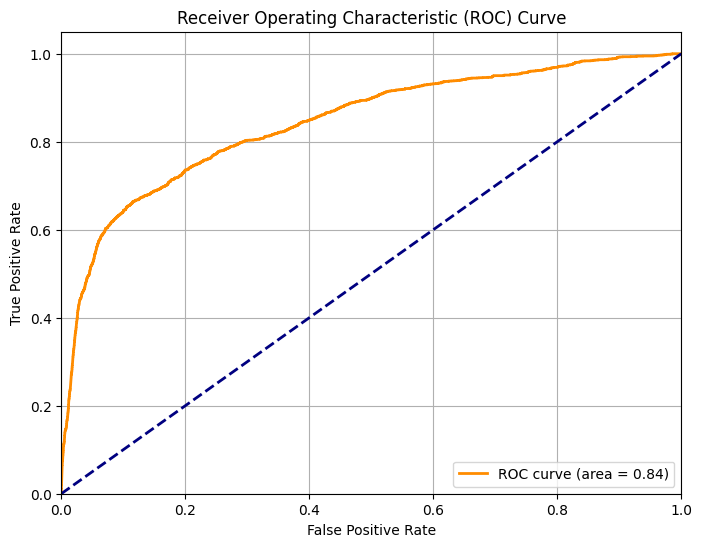

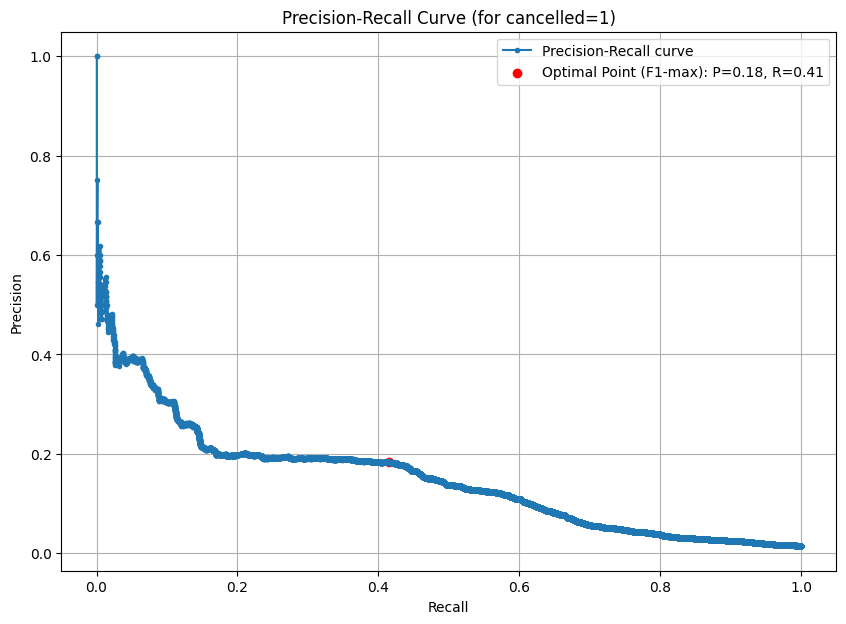


--- Additional Considerations for Further Optimization ---
1. **Hyperparameter Tuning (GridSearchCV/RandomizedSearchCV):**
   - You can use GridSearchCV/RandomizedSearchCV on the `ensemble_pipeline` itself.
   - Define a parameter grid for each step (e.g., `resampler__sampling_strategy`, `lr__C`, `dt__max_depth`, `rf__n_estimators`, `voting_classifier__weights`).
   - Set the `scoring` metric for GridSearchCV to be imbalance-aware (e.g., `f1_weighted`, `roc_auc`, or `make_scorer(f1_score, pos_label=1)`).
   - Example parameter grid (conceptual):

param_grid = {
    'resampler__sampling_strategy': ['auto', 0.5, 0.75], # Proportion of minority to majority
    'scaler__with_mean': [True, False],
    'voting_classifier__lr__C': [0.01, 0.1, 1],
    'voting_classifier__dt__max_depth': [5, 10, None],
    'voting_classifier__rf__n_estimators': [50, 100, 200],
    'voting_classifier__weights': [[1,1,1], [0.5,1,1], [1,0.5,1], [1,1,0.5]] # Explore different model weights
}
grid_search = GridSear

In [ ]:
# Install scikeras if it's not already installed
try:
    import scikeras
except ImportError:
    print("scikeras not found. Installing...")
    !pip install scikeras
    import scikeras
    print("scikeras installed successfully.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc, roc_auc_score,
    precision_recall_curve, make_scorer
)

# CORRECTED IMPORTS FOR IMBALANCED-LEARN CLASSES
from imblearn.over_sampling import SMOTE, BorderlineSMOTE # Correct: SMOTE and BorderlineSMOTE are in over_sampling
from imblearn.combine import SMOTETomek # Correct: SMOTETomek (and SMOTEENN) are in combine
from imblearn.pipeline import Pipeline as ImbPipeline

# Classifiers for Ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Ensure 'combined_flight_data_df_imputed' is available in your environment.
try:
    df_your_data = combined_flight_data_df_imputed
except NameError:
    print("Warning: 'combined_flight_data_df_imputed' not found. Creating dummy data for demonstration.")
    data = {
        'weather_delay': np.random.rand(1000) * 100,
        'distance': np.random.rand(1000) * 1000,
        'tmin': np.random.rand(1000) * 50 - 20,
        'prcp': np.random.rand(1000) * 10,
        'wspd': np.random.rand(1000) * 30,
        'pres': np.random.rand(1000) * 100 + 950,
        'cancelled': np.random.randint(0, 2, 1000)
    }
    df_your_data = pd.DataFrame(data)
    df_your_data['cancelled'] = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])


# --- FEATURE ENGINEERING ---
print("--- Performing Feature Engineering ---")
required_cols = ['weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres', 'cancelled']
if not all(col in df_your_data.columns for col in required_cols):
    print("Warning: Not all required columns for feature engineering are present in df_your_data.")
    print("Please ensure df_your_data contains:", required_cols)

if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['prcp_wspd_interaction'] = df_your_data['prcp'] * df_your_data['wspd']
    print("- Added 'prcp_wspd_interaction'")
else:
    print("- Could not add 'prcp_wspd_interaction' due to missing base columns.")

if 'tmin' in df_your_data.columns and 'wspd' in df_your_data.columns:
    df_your_data['tmin_wspd_interaction'] = df_your_data['tmin'] * df_your_data['wspd']
    print("- Added 'tmin_wspd_interaction'")
else:
    print("- Could not add 'tmin_wspd_interaction' due to missing base columns.")

if 'tmin' in df_your_data.columns and 'prcp' in df_your_data.columns:
    df_your_data['tmin_prcp_interaction'] = df_your_data['tmin'] * df_your_data['prcp']
    print("- Added 'tmin_prcp_interaction'")
else:
    print("- Could not add 'tmin_prcp_interaction' due to missing base columns.")

if 'prcp' in df_your_data.columns and 'wspd' in df_your_data.columns and 'tmin' in df_your_data.columns:
    df_your_data['adverse_weather_index'] = (
        df_your_data['prcp'] + df_your_data['wspd'] - df_your_data['tmin']
    )
    print("- Added 'adverse_weather_index'")
else:
    print("- Could not add 'adverse_weather_index' due to missing base columns.")

print("--- Feature Engineering Complete ---")


features_for_X = [
    'weather_delay', 'distance', 'tmin', 'prcp', 'wspd', 'pres',
    'prcp_wspd_interaction', 'tmin_wspd_interaction',
    'tmin_prcp_interaction', 'adverse_weather_index'
]

features_for_X = [f for f in features_for_X if f in df_your_data.columns]
if len(features_for_X) < 10:
    print(f"Warning: Only {len(features_for_X)} out of 10 intended features are present after engineering.")


X = df_your_data[features_for_X].values
y = df_your_data['cancelled'].values

print(f"\nOriginal X shape (with new features): {X.shape}")
print(f"Original y shape: {y.shape}")
unique, counts = np.unique(y, return_counts=True)
print(f"Target distribution before split:\n{dict(zip(unique, counts))}")


# --- 1. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Data Distribution After Split ---")
print("Training Set (y_train) Class Counts:\n", np.bincount(y_train))
print("Test Set (y_test) Class Counts:\n", np.bincount(y_test))


# --- 2. Define Individual Classifiers for the Ensemble with Class Weights ---
print("\n--- Defining Base Classifiers for the Ensemble with Class Weights ---")

# Using 'balanced' class_weight for all models to address imbalance directly within training
# Logistic Regression
clf_lr = LogisticRegression(random_state=42, solver='liblinear', C=0.1, class_weight='balanced')

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5, class_weight='balanced')

# Random Forest Classifier
clf_rf = RandomForestClassifier(random_state=42, n_estimators=100, max_features='sqrt', max_depth=10, class_weight='balanced')

print("- Logistic Regression initialized with class_weight='balanced'.")
print("- Decision Tree Classifier initialized with class_weight='balanced'.")
print("- Random Forest Classifier initialized with class_weight='balanced'.")


# --- 3. Create the Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---
print("\n--- Creating Ensemble Pipeline (SMOTE + StandardScaler + VotingClassifier) ---")

# Option for different SMOTE strategies: SMOTE, BorderlineSMOTE, SMOTETomek
# For this "optimal" solution, let's try SMOTETomek which also cleans up samples.
# You can switch to SMOTE() or BorderlineSMOTE() if this is too slow or doesn't improve much.
resampler = SMOTETomek(random_state=42, sampling_strategy='auto') # 'auto' balances all classes

ensemble_pipeline = ImbPipeline([
    ('resampler', resampler), # Renamed from 'smote' to 'resampler' for flexibility
    ('scaler', StandardScaler()),
    ('voting_classifier', VotingClassifier(
        estimators=[('lr', clf_lr), ('dt', clf_dt), ('rf', clf_rf)],
        voting='soft',
        weights=[1, 1, 1], # Start with equal weights, can be tuned later
        n_jobs=-1
    ))
])

# --- 4. Train the Ensemble Pipeline Model ---
print("\n--- Training Ensemble Model (Pipeline) ---")
print("This may take a few moments depending on your data size and system.")
ensemble_pipeline.fit(X_train, y_train)
print("Ensemble Pipeline trained successfully.")


# --- 5. Evaluate the Trained Ensemble Model on the Original Test Set ---
print("\n--- Evaluating Ensemble Model Performance (from Pipeline) ---")

y_pred_proba_ensemble = ensemble_pipeline.predict_proba(X_test)[:, 1]

# --- OPTIMIZATION STEP 1: Determine Optimal Threshold for Precision-Recall Trade-off ---
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_ensemble)

# Find threshold where precision and recall are close, or where recall is prioritized
# Example: Maximize F1-score for the positive class
fscore = (2 * precisions * recalls) / (precisions + recalls)
ix = np.argmax(fscore)
optimal_threshold = thresholds[ix] # Threshold that maximizes F1-score
print(f"\nOptimal Threshold (maximizing F1-score for positive class): {optimal_threshold:.4f}")

# You could also choose a threshold based on a desired minimum recall/precision
# e.g., if you need at least 60% recall:
# target_recall = 0.60
# idx_recall = np.where(recalls >= target_recall)[0][-1] # Get the largest threshold that gives at least target_recall
# optimal_threshold_for_recall = thresholds[idx_recall]
# print(f"Threshold for >= {target_recall*100}% recall: {optimal_threshold_for_recall:.4f}")


# Use the determined optimal threshold for final predictions
y_pred_ensemble_optimized = (y_pred_proba_ensemble >= optimal_threshold).astype(int)


print(f"\n--- Classification Report (Ensemble with Optimal Threshold {optimal_threshold:.4f}) ---")
print(classification_report(y_test, y_pred_ensemble_optimized))

accuracy_opt = accuracy_score(y_test, y_pred_ensemble_optimized)
precision_opt = precision_score(y_test, y_pred_ensemble_optimized, pos_label=1)
recall_opt = recall_score(y_test, y_pred_ensemble_optimized, pos_label=1)
f1_opt = f1_score(y_test, y_pred_ensemble_optimized, pos_label=1)
roc_auc_opt = roc_auc_score(y_test, y_pred_proba_ensemble) # ROC AUC doesn't change with threshold

print(f"Overall Accuracy (Ensemble, Optimized Threshold): {accuracy_opt:.4f}")
print(f"Precision (for cancelled=1, Optimized Threshold): {precision_opt:.4f}")
print(f"Recall (for cancelled=1, Optimized Threshold): {recall_opt:.4f}")
print(f"F1-Score (for cancelled=1, Optimized Threshold): {f1_opt:.4f}")
print(f"ROC AUC Score: {roc_auc_opt:.4f} (remains same with threshold change)")


conf_matrix_opt = confusion_matrix(y_test, y_pred_ensemble_optimized)
print("\nConfusion Matrix (Ensemble with Optimal Threshold):")
print(conf_matrix_opt)

# Plotting ROC Curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_ensemble)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_opt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plotting Precision-Recall Curve to visualize threshold impact
plt.figure(figsize=(10, 7))
plt.plot(recalls, precisions, marker='.', label='Precision-Recall curve')
plt.scatter(recall_opt, precision_opt, marker='o', color='red', label=f'Optimal Point (F1-max): P={precision_opt:.2f}, R={recall_opt:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (for cancelled=1)')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Additional Considerations for Further Optimization ---")
print("1. **Hyperparameter Tuning (GridSearchCV/RandomizedSearchCV):**")
print("   - You can use GridSearchCV/RandomizedSearchCV on the `ensemble_pipeline` itself.")
print("   - Define a parameter grid for each step (e.g., `resampler__sampling_strategy`, `lr__C`, `dt__max_depth`, `rf__n_estimators`, `voting_classifier__weights`).")
print("   - Set the `scoring` metric for GridSearchCV to be imbalance-aware (e.g., `f1_weighted`, `roc_auc`, or `make_scorer(f1_score, pos_label=1)`).")
print("   - Example parameter grid (conceptual):")
print("""
param_grid = {
    'resampler__sampling_strategy': ['auto', 0.5, 0.75], # Proportion of minority to majority
    'scaler__with_mean': [True, False],
    'voting_classifier__lr__C': [0.01, 0.1, 1],
    'voting_classifier__dt__max_depth': [5, 10, None],
    'voting_classifier__rf__n_estimators': [50, 100, 200],
    'voting_classifier__weights': [[1,1,1], [0.5,1,1], [1,0.5,1], [1,1,0.5]] # Explore different model weights
}
grid_search = GridSearchCV(ensemble_pipeline, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
""")
print("2. **Alternative Ensemble Methods:**")
print("   - **StackingClassifier:** Train a 'meta-learner' on the predictions of your base models. This can capture more complex relationships between the base model outputs.")
print("   - **Boosting (e.g., XGBoost, LightGBM):** While not explicitly an ensemble of your LR/DT/RF, these are powerful ensemble methods on their own and often perform exceptionally well on tabular data, especially when dealing with imbalance.")
print("3. **Feature Engineering Refinement:**")
print("   - Domain knowledge is key here. Can you create features that more directly relate to the likelihood of cancellation due to weather?")
print("   - Consider polynomial features or more complex interactions.")
print("4. **More Data / Better Data:** Always the ultimate solution if available.")